In [3]:
import torch
import torchvision
import matplotlib.pyplot as plt
from networks import Generator

ckpt_path = r"E:\courses\16824\hw2\gan\data_wgan_gp\generator.pt"
device = 'cuda' if torch.cuda.is_available() else "cpu"

ckpt = torch.jit.load(ckpt_path, map_location=device)
gen = ckpt.to(device).eval()

tensor([[-1.0000, -1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.0000, -0.7778,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.0000, -0.5556,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.0000, -0.3333,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.0000, -0.1111,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.0000,  0.1111,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.0000,  0.3333,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-1.0000,  0.5556,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       device='cuda:0')


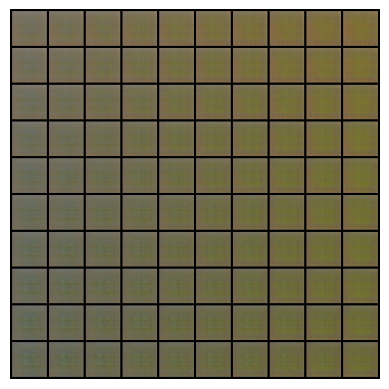

In [17]:
with torch.no_grad():
    combinations = torch.tensor([[i, j] for i in torch.linspace(-1, 1, 10) for j in torch.linspace(-1, 1, 10)])
    samples = torch.cat((combinations, torch.zeros(100, 126)), dim=1).to('cuda')

    generated = (gen.forward_given_samples(samples) + 1) / 2

grid = torchvision.utils.make_grid(generated, nrow=10)

print(samples[:8, :8])

plt.figure()
plt.axis("off")
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
plt.show()

tensor([[-1.0000, -1.0000, -0.5878,  1.8349,  0.6085, -0.5868,  0.0681, -0.2959],
        [-1.0000, -0.7778, -0.5878,  1.8349,  0.6085, -0.5868,  0.0681, -0.2959],
        [-1.0000, -0.5556, -0.5878,  1.8349,  0.6085, -0.5868,  0.0681, -0.2959],
        [-1.0000, -0.3333, -0.5878,  1.8349,  0.6085, -0.5868,  0.0681, -0.2959],
        [-1.0000, -0.1111, -0.5878,  1.8349,  0.6085, -0.5868,  0.0681, -0.2959],
        [-1.0000,  0.1111, -0.5878,  1.8349,  0.6085, -0.5868,  0.0681, -0.2959],
        [-1.0000,  0.3333, -0.5878,  1.8349,  0.6085, -0.5868,  0.0681, -0.2959],
        [-1.0000,  0.5556, -0.5878,  1.8349,  0.6085, -0.5868,  0.0681, -0.2959]],
       device='cuda:0')


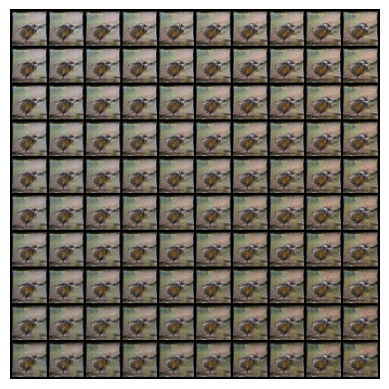

In [25]:
coloums_to_permute = [0, 1]

with torch.no_grad():
    combinations = torch.tensor([[i, j] for i in torch.linspace(-1, 1, 10) for j in torch.linspace(-1, 1, 10)]).cuda()
    
    samples = torch.randn(1, 128).repeat(100, 1).cuda()
    samples[:, coloums_to_permute] = combinations

    generated = (gen.forward_given_samples(samples) + 1) / 2

grid = torchvision.utils.make_grid(generated, nrow=10)

print(samples[:8, :8])

plt.figure()
plt.axis("off")
plt.imshow(grid.permute(1, 2, 0).cpu().numpy())
plt.show()